### Forecasting Using Stacked LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
# Python
df = pd.read_csv('invoices_im_csv.csv')
df.head()

,_id,LC_currency.Symbol,LC_currency.Code,LC_currency._id,FC_currency.Symbol,FC_currency.Code,FC_currency._id,trackingStatus.received.comment,trackingStatus.received.date,trackingStatus.received.status,...,description,invoicePath,version,__v,reviewStatus,reviewed,workflowId,approveStatus,approved,scheduledAmount
0,61278a6db52ecd84cfde68c7,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:34:53.000Z,completed,...,false,Tenants//927e3c5a-8ac5-4716-957c-25ee9bb39d54/...,1,0,reviewed,2021-08-26T12:38:14.000Z,60ed3fc2360fcb05fcfd294b,approved,2021-08-26T12:38:57.000Z,7.0
1,61278a89b52ecd1e55de68d0,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:35:21.000Z,completed,...,false,Tenants//927e3c5a-8ac5-4716-957c-25ee9bb39d54/...,1,0,reviewed,2021-08-26T12:38:19.000Z,60ed3fc2360fcb05fcfd294b,approved,2021-08-26T12:39:06.000Z,NaN
2,61278ab0b52ecdb885de68ef,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:36:00.000Z,completed,...,false,Tenants//927e3c5a-8ac5-4716-957c-25ee9bb39d54/...,1,0,reviewed,2021-08-26T12:38:24.000Z,60ed3fc2360fcb05fcfd294b,approved,2021-08-26T12:39:15.000Z,NaN
3,61278ad0b52ecd6b1bde68f9,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:36:32.000Z,completed,...,false,Tenants//927e3c5a-8ac5-4716-957c-25ee9bb39d54/...,1,0,reviewed,2021-08-26T12:38:28.000Z,60ed3fc2360fcb05fcfd294b,approved,2021-08-26T12:39:24.000Z,NaN
4,61278ae8b52ecdbab8de6903,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:36:56.000Z,completed,...,false,Tenants//927e3c5a-8ac5-4716-957c-25ee9bb39d54/...,1,0,reviewed,2021-08-26T12:38:32.000Z,60ed3fc2360fcb05fcfd294b,approved,2021-08-26T12:39:33.000Z,NaN


In [ ]:
df = df.filter(['vendorName','createdDate','netAmt'])
df

,vendorName,createdDate,netAmt
0,SALIC VENDOR,2021-02-26T12:34:53.000Z,10.00
1,SALIC VENDOR,2021-03-26T12:35:21.000Z,250.00
2,SALIC VENDOR,2021-08-26T12:36:00.000Z,400.00
3,SALIC VENDOR,2021-08-26T12:36:32.000Z,200.00
4,SALIC VENDOR,2021-05-26T12:36:56.000Z,100.00
5,SALIC VENDOR,2021-08-31T09:38:39.000Z,200.00
6,SALIC VENDOR,2021-08-31T11:42:55.000Z,300.00
7,SALIC VENDOR,2021-09-01T08:19:42.000Z,3663.00
8,Ahsan Zulfiqar,2021-09-10T11:03:53.000Z,8500.00
9,Ahsan Zulfiqar,2021-09-10T11:04:31.000Z,8500.00


In [ ]:
df = df[df["vendorName"] == "SALIC VENDOR"]
df = df.iloc[: , 1:]
# print(df)df1=df.reset_index()['close']

In [ ]:
df.rename(columns={'createdDate': 'ds', 'netAmt': 'y'}, inplace=True)

In [ ]:
date = []
for i in df["ds"]:
  i = i[:10]
  date.append(i)
df["ds"] = date
df['ds']= pd.to_datetime(df['ds'])
df

,ds,y
0,2021-02-26,10.00
1,2021-03-26,250.00
2,2021-08-26,400.00
3,2021-08-26,200.00
4,2021-05-26,100.00
5,2021-08-31,200.00
6,2021-08-31,300.00
7,2021-09-01,3663.00
13,2021-09-20,262500.00
14,2021-09-20,275.00


In [ ]:
df1 = df["y"]
df1

0         10.00
1        250.00
2        400.00
3        200.00
4        100.00
5        200.00
6        300.00
7       3663.00
13    262500.00
14       275.00
15        10.00
17       100.00
18        34.20
20       275.00
21       275.00
22       275.00
23       275.00
24       100.00
25      8712.00
26       100.00
27    250000.00
28      6180.48
29        26.25
30    250000.00
35       700.00
Name: y, dtype: float64

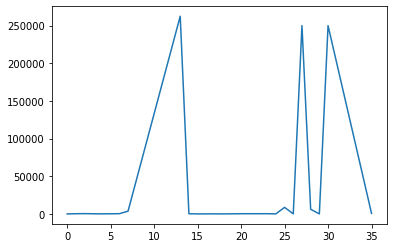

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.00000000e+00],
       [9.14320546e-04],
       [1.48577089e-03],
       [7.23837099e-04],
       [3.42870205e-04],
       [7.23837099e-04],
       [1.10480399e-03],
       [1.39167206e-02],
       [1.00000000e+00],
       [1.00956227e-03],
       [0.00000000e+00],
       [3.42870205e-04],
       [9.21939883e-05],
       [1.00956227e-03],
       [1.00956227e-03],
       [1.00956227e-03],
       [1.00956227e-03],
       [3.42870205e-04],
       [3.31517391e-02],
       [3.42870205e-04],
       [9.52379138e-01],
       [2.35074860e-02],
       [6.19071203e-05],
       [9.52379138e-01],
       [2.62867157e-03]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(16, 9)

In [ ]:
train_data

array([[0.00000000e+00],
       [9.14320546e-04],
       [1.48577089e-03],
       [7.23837099e-04],
       [3.42870205e-04],
       [7.23837099e-04],
       [1.10480399e-03],
       [1.39167206e-02],
       [1.00000000e+00],
       [1.00956227e-03],
       [0.00000000e+00],
       [3.42870205e-04],
       [9.21939883e-05],
       [1.00956227e-03],
       [1.00956227e-03],
       [1.00956227e-03]])

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(10, 5)
(10,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(3, 5)
(3,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(30,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(30,return_sequences=True))
model.add(LSTM(15))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 30)             3840      
                                                                 
 lstm_1 (LSTM)               (None, 5, 30)             7320      
                                                                 
 lstm_2 (LSTM)               (None, 15)                2760      
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 13,936
Trainable params: 13,936
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.1000 - val_loss: 0.2977
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0986 - val_loss: 0.2930
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 0.0972 - val_loss: 0.2884
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0959 - val_loss: 0.2838
Epoch 5/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0946 - val_loss: 0.2793
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 0.0935 - val_loss: 0.2748
Epoch 7/100
1/1 [==============================] - 0s 48ms/step - loss: 0.0924 - val_loss: 0.2704
Epoch 8/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0914 - val_loss: 0.2660
Epoch 9/100
1/1 [==============================] - 0s 42ms/step - loss: 0.0905 - val_loss: 0.2618
Epoch 10/100
1/1 [==============================] - 0s 43ms/step - loss: 0.0898 - val_loss: 0.2578
Epoch 11/100
1/1 [===

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35078.96166665948

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

16429.90638873144

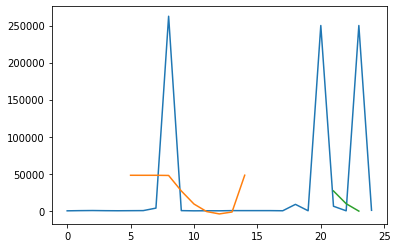

In [ ]:
### Plotting 
# shift train predictions for plotting
import numpy
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

9

In [ ]:
x_input=test_data[4:].reshape(1,-1)
x_input.shape


(1, 5)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.9523791382528858,
 0.023507485999466643,
 6.190712027124843e-05,
 0.9523791382528858,
 0.0026286715684407025]

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<30):
    
    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[-0.10995652]
6
1 day input [ 2.35074860e-02  6.19071203e-05  9.52379138e-01  2.62867157e-03
 -1.09956518e-01]
1 day output [[0.00908849]]
2 day input [ 6.19071203e-05  9.52379138e-01  2.62867157e-03 -1.09956518e-01
  9.08849016e-03]
2 day output [[0.00673017]]
3 day input [ 0.95237914  0.00262867 -0.10995652  0.00908849  0.00673017]
3 day output [[0.01727366]]
4 day input [ 0.00262867 -0.10995652  0.00908849  0.00673017  0.01727366]
4 day output [[0.2024641]]
5 day input [-0.10995652  0.00908849  0.00673017  0.01727366  0.2024641 ]
5 day output [[0.1847873]]
6 day input [0.00908849 0.00673017 0.01727366 0.2024641  0.1847873 ]
6 day output [[0.13289729]]
7 day input [0.00673017 0.01727366 0.2024641  0.1847873  0.13289729]
7 day output [[0.10298044]]
8 day input [0.01727366 0.2024641  0.1847873  0.13289729 0.10298044]
8 day output [[0.07727774]]
9 day input [0.2024641  0.1847873  0.13289729 0.10298044 0.07727774]
9 day output [[0.06164503]]
10 day input [0.1847873  0.13289729 0.10298044

In [ ]:
day_new=np.arange(1,22)
day_pred=np.arange(22,52)

In [ ]:
import matplotlib.pyplot as plt

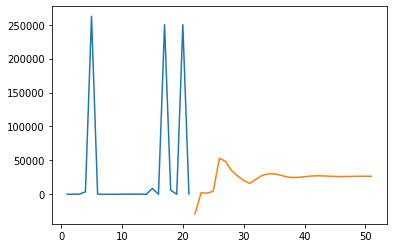

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[4:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

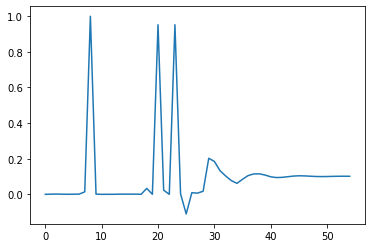

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3)